# Homework 2 - The Best Books of All Time

# Author Data (from "lighter_authors.json"):


id: A unique identifier for the author.
    
name: The name of the author.

gender: The gender of the author.

image_url: URL to an image of the author.

about: A description or biography of the author.

fans_count: The count of fans or followers of the author on the platform.


# Book Data (from "lighter_books.json"):


id: A unique identifier for the book.

title: The title of the book.

authors: A list of authors associated with the book, where each author includes an id, name, and role (e.g., author, illustrator).

isbn: ISBN (International Standard Book Number) of the book.

isbn13: ISBN-13 of the book.

asin: Amazon Standard Identification Number, if applicable.

language: The language of the book.

average_rating: The average rating given by readers.

rating_dist: Distribution of ratings (e.g., the number of 5-star, 4-star, etc., ratings).

ratings_count: The total count of ratings for the book.

text_reviews_count: The count of written text reviews for the book.

publication_date: The publication date of the book.

original_publication_date: The original publication date of the book.

format: The format in which the book is available (e.g., Paperback).

edition_information: Information about the edition of the book.

image_url: URL to an image of the book.

publisher: The publisher of the book.

num_pages: The number of pages in the book.

series_id: A unique identifier for the series to which the book belongs.

series_name: The name of the series to which the book belongs.

series_position: The position of the book within the series.

shelves: A list of shelves or categories where the book is categorized, with counts.

# [RQ1] Exploratory Data Analysis (EDA) - Before working on your research questions, you should provide meaningful statistical summaries through visualizations and tabular tools to understand your data.

In [2]:
import json
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import dask.dataframe as dd


# Import the first dataset in a dataframe called df to work on it

file_path = "./lighter_authors.json"
ch_size = 100
dfs = []

with open(file_path, "r") as file:
    for ch in pd.read_json(file, lines = True, chunksize = ch_size):
        
        dfs.append(ch)

df_authors = pd.concat(dfs, ignore_index = True)


In [3]:
chunks = pd.read_json("./lighter_authors.json", lines = True, chunksize=ch_size)

# to read columns names
for chunk in chunks:
    chunk.info()
    break

df_authors = pd.concat(chunks)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ratings_count       100 non-null    int64  
 1   average_rating      100 non-null    float64
 2   text_reviews_count  100 non-null    int64  
 3   work_ids            100 non-null    object 
 4   book_ids            100 non-null    object 
 5   works_count         100 non-null    int64  
 6   id                  100 non-null    int64  
 7   name                100 non-null    object 
 8   gender              100 non-null    object 
 9   image_url           100 non-null    object 
 10  about               100 non-null    object 
 11  fans_count          100 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 9.5+ KB


In [5]:
file_pathb = "lighter_books.json"
ch_size = 100
dfbs = []

# to import only some columns
with open(file_pathb, "r") as fileb:
    rows_read = 0
    for chb in pd.read_json(fileb, lines = True, chunksize = ch_size):
        chb = chb[["id", "title", "author_name","author_id", "work_id",
"language","average_rating","rating_dist","ratings_count","text_reviews_count","publication_date",
"original_publication_date", "format","edition_information","publisher","num_pages",
"series_id","series_name","series_position"]]
        dfbs.append(chb)
         # Update the count of rows read
        rows_read += len(chb)
        
        # Check if we have read 10,000 rows, and if so, break the loop
        if rows_read >= 10000:
            break

df_books = pd.concat(dfbs, ignore_index = True)

In [6]:
df_books

,id,title,author_name,author_id,work_id,language,average_rating,rating_dist,ratings_count,text_reviews_count,publication_date,original_publication_date,format,edition_information,publisher,num_pages,series_id,series_name,series_position
0,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,1077326,2809203,eng,4.50,5:1674064|4:664833|3:231195|2:41699|1:16215|to...,2628006,44716,2004-09,2003-06-21,Paperback,US Edition,Scholastic Inc.,870,45175,Harry Potter,5
1,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,1077326,4640799,eng,4.48,5:4801606|4:1681521|3:623286|2:145898|1:125040...,7377351,116930,2003-11-01,1997-06-26,Hardcover,Library Edition,Scholastic Inc,309,45175,Harry Potter,1
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,1077326,6231171,eng,4.43,5:1690166|4:781011|3:313727|2:54687|1:15453|to...,2855044,55286,2003-11-01,1998-07-02,Hardcover,,Scholastic,352,45175,Harry Potter,2
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,1077326,2402163,eng,4.57,5:1994597|4:696545|3:212678|2:28915|1:13959|to...,2946694,58023,2004-05-01,1999-07-08,Mass Market Paperback,,Scholastic Inc.,435,45175,Harry Potter,3
4,6,Harry Potter and the Goblet of Fire (Harry Pot...,J.K. Rowling,1077326,3046572,eng,4.56,5:1808039|4:663849|3:193604|2:27759|1:12425|to...,2705676,48637,2002-09-28,2000-07-08,Paperback,First Scholastic Trade Paperback Edition,Scholastic,734,45175,Harry Potter,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10094,15636,Doktor Zhivago,Boris Pasternak,7902,3288400,,4.01,5:31967|4:28973|3:15814|2:4755|1:1986|total:83495,83495,3203,2006,1957-11,Hardcover,,AST,701,,,
10095,15637,Cyrano de Bergerac,Edmond Rostand,670859,2327623,,4.07,5:28961|4:24475|3:14659|2:3200|1:994|total:72289,72289,2079,2000-05-24,1897,Paperback,,Dover Publications,144,,,
10096,15638,Cyrano de Bergerac,Edmond Rostand,670859,2327623,eng,4.07,5:28961|4:24475|3:14659|2:3200|1:994|total:72289,72289,2079,2003-08-05,1897,Paperback,,Signet Classics,240,,,
10097,15639,Cyrano de Bergerac,Edmond Rostand,670859,2327623,fre,4.07,5:28961|4:24475|3:14659|2:3200|1:994|total:72289,72289,2079,1990-09,1897,Mass Market Paperback,Classiques,Le Livre de Poche,287,,,


In [11]:
# Basic statistics for authors
author_summary = df_authors.describe()
author_summary


,ratings_count,average_rating,text_reviews_count,works_count,id,fans_count
count,3.516670e+05,351667.000000,351667.000000,3.516670e+05,3.516670e+05,351667.000000
mean,4.722160e+03,3.651130,329.149263,2.589748e+01,7.754018e+06,111.314681
std,9.729598e+04,1.211622,3847.476625,3.066505e+03,6.578041e+06,2660.859187
min,-4.100000e+01,-31.000000,0.000000,0.000000e+00,2.290000e+02,-33.000000
25%,6.000000e+00,3.600000,1.000000,2.000000e+00,1.539442e+06,1.000000
50%,3.900000e+01,3.950000,8.000000,6.000000e+00,6.470838e+06,4.000000
75%,3.100000e+02,4.250000,53.000000,1.500000e+01,1.434233e+07,20.000000
max,2.700375e+07,5.000000,608956.000000,1.775176e+06,2.124802e+07,766035.000000


In [12]:
# Basic statistics for books
book_summary = df_books.describe()
book_summary

,id,author_id,work_id,average_rating,ratings_count,text_reviews_count
count,10099.000000,1.009900e+04,1.009900e+04,10099.000000,1.009900e+04,10099.000000
mean,7969.885137,5.907518e+05,3.256552e+06,3.898047,1.135332e+05,3149.536588
std,4538.079585,2.181688e+06,9.860032e+06,0.534808,4.013346e+05,8973.865779
min,2.000000,4.000000e+00,6.200000e+01,0.000000,0.000000e+00,0.000000
25%,4009.500000,2.278000e+03,1.372050e+04,3.760000,2.150000e+02,16.000000
50%,8035.000000,5.065000e+03,8.560050e+05,3.960000,3.047000e+03,158.000000
75%,11935.500000,8.552500e+03,2.271000e+06,4.150000,3.549700e+04,1615.000000
max,15640.000000,2.086472e+07,8.856621e+07,5.000000,7.377351e+06,116930.000000


In [20]:
df_authors.isnull().sum()
df_books.isnull().sum()


id                           0
title                        0
author_name                  0
author_id                    0
work_id                      0
language                     0
average_rating               0
rating_dist                  0
ratings_count                0
text_reviews_count           0
publication_date             0
original_publication_date    0
format                       0
edition_information          0
publisher                    0
num_pages                    0
series_id                    0
series_name                  0
series_position              0
dtype: int64

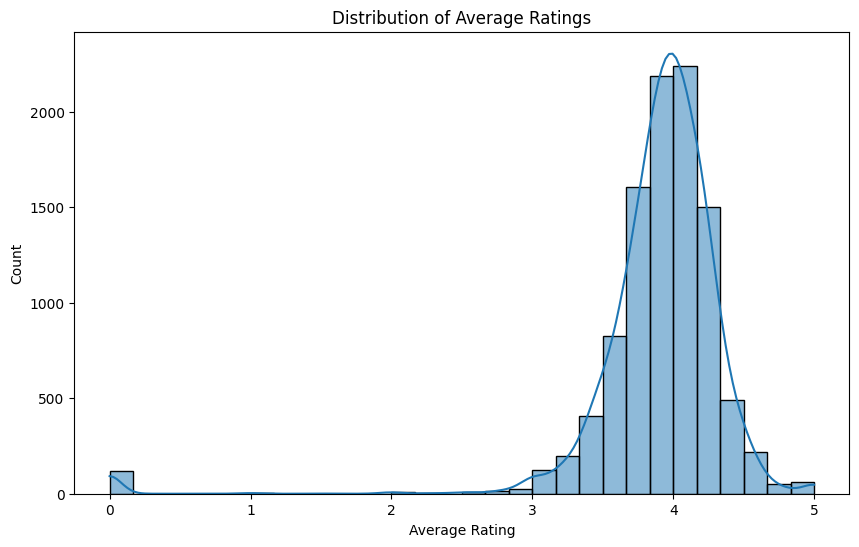

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
# 2. Visualizations
# distribution of average ratings
plt.figure(figsize=(10, 6))
sns.histplot(df_books['average_rating'], bins=30, kde=True)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.show()

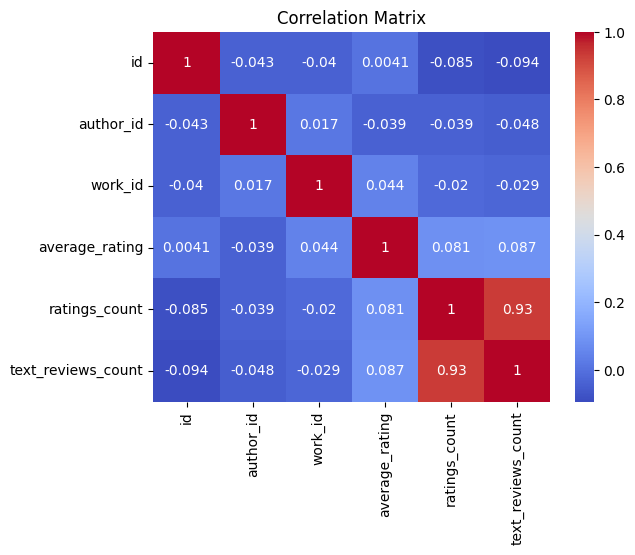

In [22]:
# 3. Explore correlations between variables
correlation_matrix = df_books.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [24]:
# 4. Investigate the top authors by the number of works
top_authors = df_authors.sort_values(by='works_count', ascending=False).head(10)
top_authors

,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,image_url,about,fans_count
83322,115710,4.07,9411,"[45100209, 3628, 1507439, 85644185, 24676995, ...","[25357793, 530270, 1515734, 54883522, 17673542...",1775176,1000834,NOT A BOOK,,https://s.gr-assets.com/assets/nophoto/user/u_...,This profile was created to segregate those it...,4504
213945,8510,4.02,527,"[21723362, 22939358, 22945924, 22579311, 22982...","[15971714, 16706030, 16712573, 16392251, 16739...",186086,5823409,Jesse Russell,male,https://s.gr-assets.com/assets/nophoto/user/m_...,"Bookvika Publishing, VSD, Book on Demand Ltd —...",164
155912,8896,4.03,603,"[45374727, 42340520, 64602098, 26803594, 64492...","[25573859, 22795625, 41384870, 18855820, 41284...",186047,3393273,Ronald Cohn,male,https://s.gr-assets.com/assets/nophoto/user/m_...,"Bookvika Publishing, VSD, Book on Demand Ltd —...",31
198315,1434041,4.15,78830,"[6405906, 2139868, 3802528, 19119100, 859375, ...","[1923820, 323355, 19351, 280111, 93101, 646462...",182675,5158478,Anonymous,,https://s.gr-assets.com/assets/nophoto/user/u_...,"Books can be attributed to ""Anonymous"" for sev...",2456
187134,431204,3.58,18883,"[189503, 2954048, 15068023, 477, 370900, 11453...","[52357, 3049, 23613, 73419, 381112, 18261, 100...",163434,4699102,Unknown,,https://s.gr-assets.com/assets/nophoto/user/u_...,"Books can be attributed to ""Unknown"" when the ...",1067
198175,12245,4.24,402,"[17594822, 14856254, 14149404, 17788235, 18149...","[12583816, 9962321, 8882037, 12673086, 1298938...",120379,5153555,Source Wikipedia,,https://s.gr-assets.com/assets/nophoto/user/u_...,Source Wikipedia is a compiler and publisher o...,143
207023,332569,4.00,32470,"[42863273, 22314408, 74837230, 47301079, 59548...","[23308785, 16268895, 49583273, 27251758, 37851...",79378,5481957,Various,,https://s.gr-assets.com/assets/nophoto/user/u_...,Various is the correct author for any book wit...,898
2665,389,4.23,33,"[1435582, 23125635, 1190378, 2905152, 1574687,...","[687877, 16859302, 1202214, 2878966, 1581839, ...",27480,8777,Philip M. Parker,,https://images.gr-assets.com/authors/122757842...,Philip M. Parker holds the INSEAD Chair Profes...,10
196968,344,4.11,34,"[27082935, 18388196, 13037839, 14432878, 98391...","[19057547, 13204506, 8191071, 9546457, 7548902...",25835,5107074,U.S. Congress,,https://images.gr-assets.com/authors/145832599...,The United States Congress is the bicameral le...,47
177784,31103,4.26,1518,"[13840870, 13580571, 15179103, 13583081, 13811...","[8963953, 8707741, 8526824, 8710225, 8935166, ...",24975,4340042,Books LLC,,https://s.gr-assets.com/assets/nophoto/user/u_...,Books LLC is a reprint publisher of nonfiction...,158


In [26]:
# Print results
print("Authors Summary Statistics:")
print(author_summary)
print("\nBooks Summary Statistics:")
print(book_summary)
print("\nTop Authors by Works:")
print(top_authors)

Authors Summary Statistics:
       ratings_count  average_rating  text_reviews_count   works_count  \
count   3.516670e+05   351667.000000       351667.000000  3.516670e+05   
mean    4.722160e+03        3.651130          329.149263  2.589748e+01   
std     9.729598e+04        1.211622         3847.476625  3.066505e+03   
min    -4.100000e+01      -31.000000            0.000000  0.000000e+00   
25%     6.000000e+00        3.600000            1.000000  2.000000e+00   
50%     3.900000e+01        3.950000            8.000000  6.000000e+00   
75%     3.100000e+02        4.250000           53.000000  1.500000e+01   
max     2.700375e+07        5.000000       608956.000000  1.775176e+06   

                 id     fans_count  
count  3.516670e+05  351667.000000  
mean   7.754018e+06     111.314681  
std    6.578041e+06    2660.859187  
min    2.290000e+02     -33.000000  
25%    1.539442e+06       1.000000  
50%    6.470838e+06       4.000000  
75%    1.434233e+07      20.000000  
max    2.

# [RQ2] Let’s finally dig into this vast dataset, retrieving some vital information:

Plot the number of books for each author in descending order.
Which book has the highest number of reviews?
Which are the top ten and ten worst books concerning the average score?
Explore the different languages in the book’s dataset, providing a proper chart summarizing how these languages are distributed throughout our virtual library.
How many books have more than 250 pages?
Plot the distribution of the fans count for the 50 most prolific authors (the ones who have written more books).

In [31]:
len(df_books['author_name'].unique())

2943

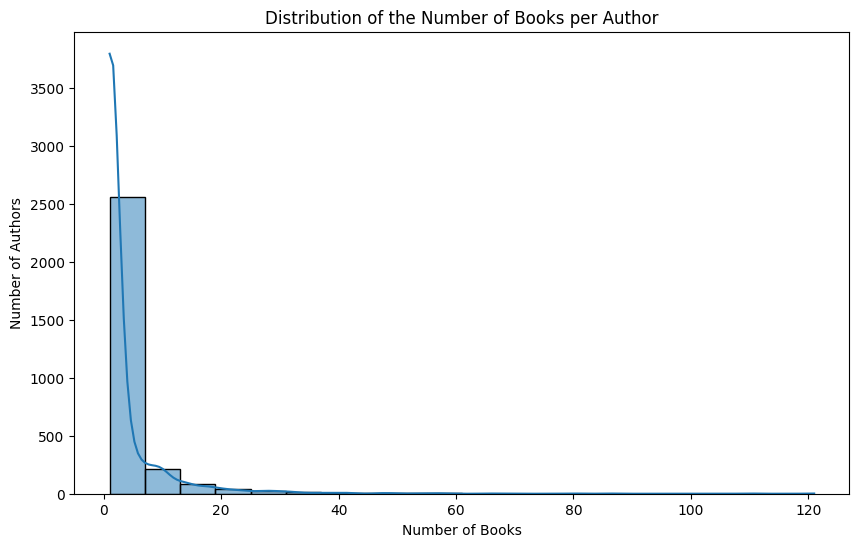

In [40]:
# Task 1: Plot the number of books for each author in descending order
author_book_counts = df_books['author_id'].value_counts()

plt.figure(figsize=(10, 6))
sns.histplot(author_book_counts, bins=20, kde=True)
plt.title('Distribution of the Number of Books per Author')
plt.xlabel('Number of Books')
plt.ylabel('Number of Authors')
plt.show()

In [33]:
# Task 2: Find the book with the highest number of reviews
book_with_highest_reviews = df_books[df_books['text_reviews_count'] == df_books['text_reviews_count'].max()]
print("Book with the highest number of reviews:")
print(book_with_highest_reviews[['title', 'text_reviews_count']])

Book with the highest number of reviews:
                                               title  text_reviews_count
1  Harry Potter and the Sorcerer's Stone (Harry P...              116930


In [34]:
# Task 3: Find the top ten and ten worst books concerning the average score
top_ten_books = df_books.sort_values(by='average_rating', ascending=False).head(10)
worst_ten_books = df_books.sort_values(by='average_rating').head(10)
print("\nTop Ten Books by Average Score:")
print(top_ten_books[['title', 'average_rating']])
print("\nWorst Ten Books by Average Score:")
print(worst_ten_books[['title', 'average_rating']])


Top Ten Books by Average Score:
                                                  title  average_rating
8549                        Mark Rothko (Postcard Book)             5.0
671   Delaware 1638-1776 (Voices from Colonial America)             5.0
9673  Sleight of Hand: Conversations with Walter Sat...             5.0
653                                          Bernie Mac             5.0
3045  The Decoration of the Torre de la Parada (Corp...             5.0
1101           Singers, Heroes, and Gods in the Odyssey             5.0
1521                         Prolegomena to Homer, 1795             5.0
5874  Comedies and Mysteries for Young Actors: A Col...             5.0
2844         Pages & Stages: The Art Of E.L. Konigsburg             5.0
2787                                  Peck Gift Set Cst             5.0

Worst Ten Books by Average Score:
                                                  title  average_rating
780                      Juiced Official Strategy Guide             

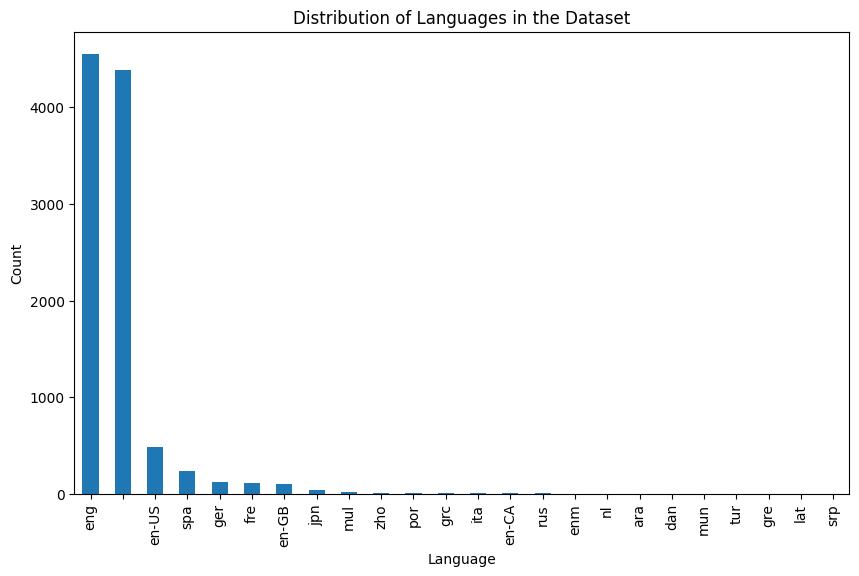

In [36]:
# Task 4: Explore the different languages in the book dataset
language_counts = df_books['language'].value_counts()
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar')
plt.title('Distribution of Languages in the Dataset')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

In [43]:
# Task 5: Count how many books have more than 250 pages
df_books['num_pages'].replace('', 0, inplace=True)

# Convert 'pages' column to integers
df_books['num_pages'] = df_books['num_pages'].astype(int)

# Filter books with more than 250 pages
books_gt_250_pages = df_books[df_books['num_pages'] > 250]

# Get the count of such books
num_books_gt_250_pages = len(books_gt_250_pages)

print(f'Number of books with more than 250 pages: {num_books_gt_250_pages}')

Number of books with more than 250 pages: 4857


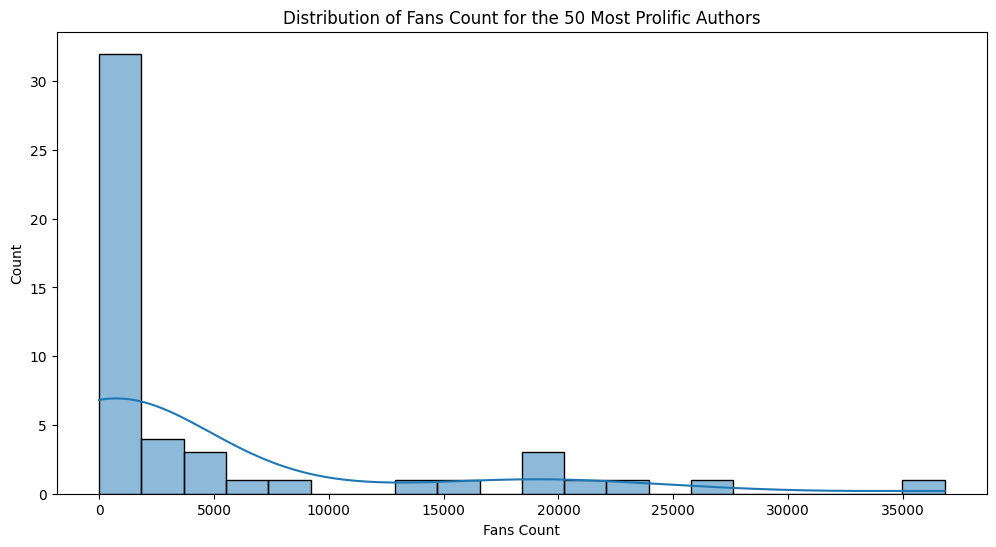

In [39]:
# Task 6: Plot the distribution of the fans count for the 50 most prolific authors
top_authors_by_books = df_authors.sort_values(by='works_count', ascending=False).head(50)
plt.figure(figsize=(12, 6))
sns.histplot(top_authors_by_books['fans_count'], bins=20, kde=True)
plt.title('Distribution of Fans Count for the 50 Most Prolific Authors')
plt.xlabel('Fans Count')
plt.ylabel('Count')
plt.show()